# Machine Listening (Fall 2020)


# Lab8_1 : speech MNIST

In [2]:
# download speech-mnist audio data
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1vD12AFfbA8vrTHeXb1IKk4wKbZwWDARg' -O recordings.zip
!mkdir speech_mnist
!unzip -qq ./recordings.zip -d ./speech_mnist 

mkdir: cannot create directory ‘speech_mnist’: File exists


In [4]:

!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1CFKZf97pTozo2DNPnDsMcY0SVPvN8mj-' -O recordings_npy.zip
!unzip -qq ./recordings_npy.zip -d ./speech_mnist 


# 학습 데이터 둘러보기


압축 해제가 완료되면, 왼쪽 탭에서 우리가 사용할 오디오 데이터를 확인할 수 있습니다.

(Ex. 0_jackson_0.wav)


In [5]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np
import glob

audio_path = './speech_mnist/0_jackson_0.npy' # audio의 경로를 지정
sr = 8000
audio = np.load(audio_path) # audio 불러오기
print('이 오디오의 샘플 레이트는 :', sr, 'Hz')
ipd.Audio(audio, rate=8000, autoplay=False)

이 오디오의 샘플 레이트는 : 8000 Hz


In [6]:
import glob
import librosa
from sklearn.model_selection import train_test_split

speech_mnist_data = []
speech_mnist_target = []


# preprocessing for all audio (extract mel-spectrogram)
speech_mnist = glob.glob('./speech_mnist/*.npy')
for item in speech_mnist:
  target, speaker, index = item.split('/')[-1].split('.npy')[0].split('_')
  
  wavs = np.load(item)
  mel = librosa.feature.melspectrogram(wavs, sr=8000, n_mels=80)
  
  speech_mnist_data.append(mel)
  speech_mnist_target.append(np.eye(10)[(int)(target)])

# 모든 mel-spectrogram의 데이터 길이 (시간)을 확인합니다. 가장 긴 mel-spec에 맞춰 나머지 mel을 zero-padding 해주기 위함입니다.
data_length = []
for item in speech_mnist_data:
  data_length.append(np.shape(item)[1])


print('max length : ' + (str)(np.max(data_length)))


# zero-pad all mel to max length
def pad(mel, max_length):
  if np.shape(mel)[1] > max_length:
    return mel[:,:max_length]
  else:
    return np.concatenate((mel, np.zeros((80, max_length-np.shape(mel)[1]))), axis=1)

max_length = np.max(data_length)
speech_mnist_data_pad = []
for item in speech_mnist_data:
  speech_mnist_data_pad.append(pad(item, max_length))


speech_mnist_data_final = np.reshape(speech_mnist_data_pad, (np.shape(speech_mnist_data_pad)[0],-1))
speech_mnist_target = np.asarray(speech_mnist_target)
print('shape of training data : ' + (str)(np.shape(speech_mnist_data_pad)))
print('shape of training data (flatten) : ' + (str)(np.shape(speech_mnist_data_final)))
print('shape of target data : ' + (str)(np.shape(speech_mnist_target)))

X_train, X_test, Y_train, Y_test = train_test_split(speech_mnist_data_final, speech_mnist_target, test_size=0.25, random_state=0)


/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1968
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1911
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1998
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1988
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2043
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1296
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1567
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1987
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1556
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1579
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1673
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1403
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1749
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1682
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1632
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

max length : 36
shape of training data : (2000, 80, 36)
shape of training data (flatten) : (2000, 2880)
shape of target data : (2000, 10)


#모델 설계

학습 데이터는 모두 준비되었고, 이제 학습을 위한 모델을 설계해보겠습니다.

Epoch 1/500
3/3 [==============================] - 0s 36ms/step - loss: 4.3757 - accuracy: 0.0852 - val_loss: 4.6677 - val_accuracy: 0.1067
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 4.3620 - accuracy: 0.0852 - val_loss: 4.6541 - val_accuracy: 0.1067
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 4.3485 - accuracy: 0.0859 - val_loss: 4.6402 - val_accuracy: 0.1067
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 4.3350 - accuracy: 0.0874 - val_loss: 4.6263 - val_accuracy: 0.1067
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 4.3215 - accuracy: 0.0889 - val_loss: 4.6122 - val_accuracy: 0.1067
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 4.3078 - accuracy: 0.0881 - val_loss: 4.5983 - val_accuracy: 0.1067
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 4.2943 - accuracy: 0.0874 - val_loss: 4.5845 - val_accuracy: 0.1067
Epoch 8/500
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 3.1409 - accuracy: 0.1452 - val_loss: 3.4644 - val_accuracy: 0.1467
Epoch 118/500
3/3 [==============================] - 0s 8ms/step - loss: 3.1334 - accuracy: 0.1452 - val_loss: 3.4577 - val_accuracy: 0.1467
Epoch 119/500
3/3 [==============================] - 0s 9ms/step - loss: 3.1260 - accuracy: 0.1452 - val_loss: 3.4509 - val_accuracy: 0.1467
Epoch 120/500
3/3 [==============================] - 0s 9ms/step - loss: 3.1186 - accuracy: 0.1444 - val_loss: 3.4444 - val_accuracy: 0.1467
Epoch 121/500
3/3 [==============================] - 0s 9ms/step - loss: 3.1114 - accuracy: 0.1452 - val_loss: 3.4380 - val_accuracy: 0.1467
Epoch 122/500
3/3 [==============================] - 0s 8ms/step - loss: 3.1042 - accuracy: 0.1459 - val_loss: 3.4314 - val_accuracy: 0.1467
Epoch 123/500
3/3 [==============================] - 0s 9ms/step - loss: 3.0969 - accuracy: 0.1481 - val_loss: 3.4249 - val_accuracy: 0.1467
Epoch 124/500
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 2.5347 - accuracy: 0.1978 - val_loss: 2.8845 - val_accuracy: 0.1800
Epoch 234/500
3/3 [==============================] - 0s 8ms/step - loss: 2.5310 - accuracy: 0.1985 - val_loss: 2.8810 - val_accuracy: 0.1800
Epoch 235/500
3/3 [==============================] - 0s 10ms/step - loss: 2.5274 - accuracy: 0.1985 - val_loss: 2.8774 - val_accuracy: 0.1800
Epoch 236/500
3/3 [==============================] - 0s 8ms/step - loss: 2.5238 - accuracy: 0.2000 - val_loss: 2.8739 - val_accuracy: 0.1733
Epoch 237/500
3/3 [==============================] - 0s 9ms/step - loss: 2.5202 - accuracy: 0.1993 - val_loss: 2.8703 - val_accuracy: 0.1667
Epoch 238/500
3/3 [==============================] - 0s 10ms/step - loss: 2.5166 - accuracy: 0.2000 - val_loss: 2.8667 - val_accuracy: 0.1667
Epoch 239/500
3/3 [==============================] - 0s 8ms/step - loss: 2.5130 - accuracy: 0.2000 - val_loss: 2.8632 - val_accuracy: 0.1667
Epoch 240/500
3/3 [======

3/3 [==============================] - 0s 10ms/step - loss: 2.2500 - accuracy: 0.2422 - val_loss: 2.5560 - val_accuracy: 0.1867
Epoch 350/500
3/3 [==============================] - 0s 9ms/step - loss: 2.2485 - accuracy: 0.2415 - val_loss: 2.5537 - val_accuracy: 0.1867
Epoch 351/500
3/3 [==============================] - 0s 9ms/step - loss: 2.2470 - accuracy: 0.2422 - val_loss: 2.5515 - val_accuracy: 0.1867
Epoch 352/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2454 - accuracy: 0.2407 - val_loss: 2.5495 - val_accuracy: 0.1867
Epoch 353/500
3/3 [==============================] - 0s 9ms/step - loss: 2.2440 - accuracy: 0.2407 - val_loss: 2.5474 - val_accuracy: 0.1867
Epoch 354/500
3/3 [==============================] - 0s 9ms/step - loss: 2.2426 - accuracy: 0.2407 - val_loss: 2.5452 - val_accuracy: 0.1867
Epoch 355/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2411 - accuracy: 0.2415 - val_loss: 2.5431 - val_accuracy: 0.1867
Epoch 356/500
3/3 [=====

3/3 [==============================] - 0s 9ms/step - loss: 2.1762 - accuracy: 0.2563 - val_loss: 2.4489 - val_accuracy: 0.2000
Epoch 408/500
3/3 [==============================] - 0s 9ms/step - loss: 2.1751 - accuracy: 0.2578 - val_loss: 2.4475 - val_accuracy: 0.2000
Epoch 409/500
3/3 [==============================] - 0s 8ms/step - loss: 2.1741 - accuracy: 0.2570 - val_loss: 2.4459 - val_accuracy: 0.2000
Epoch 410/500
3/3 [==============================] - 0s 9ms/step - loss: 2.1730 - accuracy: 0.2570 - val_loss: 2.4444 - val_accuracy: 0.2000
Epoch 411/500
3/3 [==============================] - 0s 9ms/step - loss: 2.1720 - accuracy: 0.2578 - val_loss: 2.4428 - val_accuracy: 0.2000
Epoch 412/500
3/3 [==============================] - 0s 9ms/step - loss: 2.1709 - accuracy: 0.2578 - val_loss: 2.4413 - val_accuracy: 0.2000
Epoch 413/500
3/3 [==============================] - 0s 8ms/step - loss: 2.1698 - accuracy: 0.2578 - val_loss: 2.4399 - val_accuracy: 0.2000
Epoch 414/500
3/3 [========

Text(0.5, 1.0, 'baseline loss')

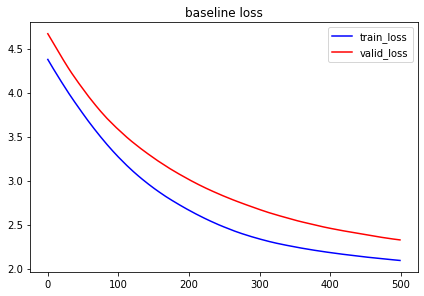

In [7]:
# baseline model 

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling
from keras.optimizers import Adam

input_size = np.shape(speech_mnist_data_final)[-1]
batch_size = 500    
hidden_neurons = 400
epochs = 500
classes = 10

model = Sequential()
model.add(Dense(hidden_neurons, activation = 'relu', input_dim=input_size))
model.add(Dense(classes, activation = 'relu', input_dim=hidden_neurons))
model.add(Dense(classes, activation = 'softmax', input_dim=hidden_neurons))


model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')


hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

plt.plot(hist.history['loss'], 'b-', label='train_loss')
plt.plot(hist.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
plt.tight_layout()
plt.title('baseline loss')

Epoch 1/500
3/3 [==============================] - 0s 34ms/step - loss: 4.6865 - accuracy: 0.1163 - val_loss: 4.5948 - val_accuracy: 0.1133
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 4.6718 - accuracy: 0.1178 - val_loss: 4.5798 - val_accuracy: 0.1133
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 4.6573 - accuracy: 0.1193 - val_loss: 4.5649 - val_accuracy: 0.1200
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 4.6430 - accuracy: 0.1185 - val_loss: 4.5500 - val_accuracy: 0.1200
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 4.6287 - accuracy: 0.1185 - val_loss: 4.5353 - val_accuracy: 0.1200
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 4.6147 - accuracy: 0.1185 - val_loss: 4.5205 - val_accuracy: 0.1200
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 4.6006 - accuracy: 0.1193 - val_loss: 4.5058 - val_accuracy: 0.1200
Epoch 8/500
3/3 [=====

3/3 [==============================] - 0s 10ms/step - loss: 3.4019 - accuracy: 0.1519 - val_loss: 3.2396 - val_accuracy: 0.1600
Epoch 118/500
3/3 [==============================] - 0s 10ms/step - loss: 3.3937 - accuracy: 0.1519 - val_loss: 3.2308 - val_accuracy: 0.1533
Epoch 119/500
3/3 [==============================] - 0s 10ms/step - loss: 3.3855 - accuracy: 0.1526 - val_loss: 3.2222 - val_accuracy: 0.1533
Epoch 120/500
3/3 [==============================] - 0s 10ms/step - loss: 3.3774 - accuracy: 0.1526 - val_loss: 3.2137 - val_accuracy: 0.1533
Epoch 121/500
3/3 [==============================] - 0s 10ms/step - loss: 3.3695 - accuracy: 0.1556 - val_loss: 3.2055 - val_accuracy: 0.1533
Epoch 122/500
3/3 [==============================] - 0s 11ms/step - loss: 3.3615 - accuracy: 0.1556 - val_loss: 3.1970 - val_accuracy: 0.1600
Epoch 123/500
3/3 [==============================] - 0s 10ms/step - loss: 3.3533 - accuracy: 0.1556 - val_loss: 3.1886 - val_accuracy: 0.1600
Epoch 124/500
3/3 [=

Epoch 232/500
3/3 [==============================] - 0s 10ms/step - loss: 2.6879 - accuracy: 0.2030 - val_loss: 2.6035 - val_accuracy: 0.2000
Epoch 233/500
3/3 [==============================] - 0s 10ms/step - loss: 2.6838 - accuracy: 0.2030 - val_loss: 2.6004 - val_accuracy: 0.2000
Epoch 234/500
3/3 [==============================] - 0s 10ms/step - loss: 2.6797 - accuracy: 0.2044 - val_loss: 2.5975 - val_accuracy: 0.2000
Epoch 235/500
3/3 [==============================] - 0s 9ms/step - loss: 2.6756 - accuracy: 0.2030 - val_loss: 2.5946 - val_accuracy: 0.2000
Epoch 236/500
3/3 [==============================] - 0s 10ms/step - loss: 2.6716 - accuracy: 0.2030 - val_loss: 2.5920 - val_accuracy: 0.2000
Epoch 237/500
3/3 [==============================] - 0s 11ms/step - loss: 2.6676 - accuracy: 0.2044 - val_loss: 2.5895 - val_accuracy: 0.2000
Epoch 238/500
3/3 [==============================] - 0s 9ms/step - loss: 2.6637 - accuracy: 0.2052 - val_loss: 2.5868 - val_accuracy: 0.2000
Epoch 23

Epoch 290/500
3/3 [==============================] - 0s 9ms/step - loss: 2.4893 - accuracy: 0.2141 - val_loss: 2.4768 - val_accuracy: 0.2133
Epoch 291/500
3/3 [==============================] - 0s 10ms/step - loss: 2.4866 - accuracy: 0.2148 - val_loss: 2.4750 - val_accuracy: 0.2133
Epoch 292/500
3/3 [==============================] - 0s 11ms/step - loss: 2.4839 - accuracy: 0.2156 - val_loss: 2.4733 - val_accuracy: 0.2133
Epoch 293/500
3/3 [==============================] - 0s 11ms/step - loss: 2.4811 - accuracy: 0.2156 - val_loss: 2.4715 - val_accuracy: 0.2133
Epoch 294/500
3/3 [==============================] - 0s 9ms/step - loss: 2.4785 - accuracy: 0.2185 - val_loss: 2.4697 - val_accuracy: 0.2133
Epoch 295/500
3/3 [==============================] - 0s 9ms/step - loss: 2.4757 - accuracy: 0.2185 - val_loss: 2.4680 - val_accuracy: 0.2133
Epoch 296/500
3/3 [==============================] - 0s 11ms/step - loss: 2.4731 - accuracy: 0.2185 - val_loss: 2.4661 - val_accuracy: 0.2133
Epoch 297

Epoch 405/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2838 - accuracy: 0.2481 - val_loss: 2.3196 - val_accuracy: 0.2333
Epoch 406/500
3/3 [==============================] - 0s 11ms/step - loss: 2.2826 - accuracy: 0.2474 - val_loss: 2.3187 - val_accuracy: 0.2333
Epoch 407/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2814 - accuracy: 0.2474 - val_loss: 2.3176 - val_accuracy: 0.2333
Epoch 408/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2802 - accuracy: 0.2489 - val_loss: 2.3166 - val_accuracy: 0.2333
Epoch 409/500
3/3 [==============================] - 0s 9ms/step - loss: 2.2790 - accuracy: 0.2481 - val_loss: 2.3155 - val_accuracy: 0.2333
Epoch 410/500
3/3 [==============================] - 0s 9ms/step - loss: 2.2779 - accuracy: 0.2481 - val_loss: 2.3146 - val_accuracy: 0.2333
Epoch 411/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2767 - accuracy: 0.2474 - val_loss: 2.3137 - val_accuracy: 0.2333
Epoch 41

Epoch 463/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2186 - accuracy: 0.2681 - val_loss: 2.2721 - val_accuracy: 0.2467
Epoch 464/500
3/3 [==============================] - 0s 11ms/step - loss: 2.2174 - accuracy: 0.2696 - val_loss: 2.2713 - val_accuracy: 0.2467
Epoch 465/500
3/3 [==============================] - 0s 9ms/step - loss: 2.2162 - accuracy: 0.2704 - val_loss: 2.2705 - val_accuracy: 0.2467
Epoch 466/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2149 - accuracy: 0.2711 - val_loss: 2.2697 - val_accuracy: 0.2467
Epoch 467/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2138 - accuracy: 0.2711 - val_loss: 2.2689 - val_accuracy: 0.2533
Epoch 468/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2126 - accuracy: 0.2719 - val_loss: 2.2681 - val_accuracy: 0.2533
Epoch 469/500
3/3 [==============================] - 0s 10ms/step - loss: 2.2114 - accuracy: 0.2719 - val_loss: 2.2674 - val_accuracy: 0.2533
Epoch 4

Text(0.5, 1.0, 'L2 regularization loss')

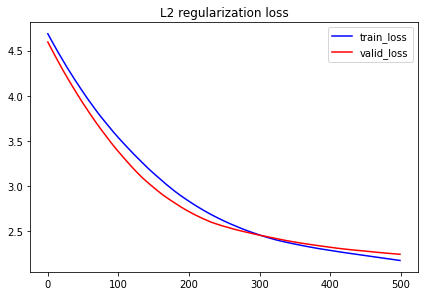

In [8]:
# baseline model with L2 regularization
from keras.regularizers import l2
input_size = 2880
batch_size = 500    
hidden_neurons = 400
epochs = 500

kernel_regularizer = l2(0.0001)

model = Sequential()     
model.add(Dense(hidden_neurons, activation = 'relu', input_dim=input_size, kernel_regularizer=kernel_regularizer))
model.add(Dense(classes, activation = 'relu', input_dim=hidden_neurons, kernel_regularizer=kernel_regularizer))
model.add(Dense(classes, activation = 'softmax', input_dim=hidden_neurons, kernel_regularizer=kernel_regularizer))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

hist_l2 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

plt.plot(hist_l2.history['loss'], 'b-', label='train_loss')
plt.plot(hist_l2.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
plt.tight_layout()
plt.title('L2 regularization loss')


Epoch 1/500
3/3 [==============================] - 0s 31ms/step - loss: 4.2826 - accuracy: 0.1030 - val_loss: 4.2828 - val_accuracy: 0.0667
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 4.3801 - accuracy: 0.1104 - val_loss: 4.2719 - val_accuracy: 0.0667
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 4.2920 - accuracy: 0.1126 - val_loss: 4.2607 - val_accuracy: 0.0667
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 4.4275 - accuracy: 0.0978 - val_loss: 4.2499 - val_accuracy: 0.0667
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 4.3229 - accuracy: 0.1119 - val_loss: 4.2390 - val_accuracy: 0.0667
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 4.3679 - accuracy: 0.0963 - val_loss: 4.2279 - val_accuracy: 0.0667
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 4.3117 - accuracy: 0.1133 - val_loss: 4.2174 - val_accuracy: 0.0667
Epoch 8/500
3/3 [======

3/3 [==============================] - 0s 9ms/step - loss: 3.3027 - accuracy: 0.1341 - val_loss: 3.3176 - val_accuracy: 0.0867
Epoch 118/500
3/3 [==============================] - 0s 8ms/step - loss: 3.2900 - accuracy: 0.1333 - val_loss: 3.3114 - val_accuracy: 0.0867
Epoch 119/500
3/3 [==============================] - 0s 9ms/step - loss: 3.3078 - accuracy: 0.1393 - val_loss: 3.3049 - val_accuracy: 0.0800
Epoch 120/500
3/3 [==============================] - 0s 9ms/step - loss: 3.2340 - accuracy: 0.1274 - val_loss: 3.2994 - val_accuracy: 0.0867
Epoch 121/500
3/3 [==============================] - 0s 9ms/step - loss: 3.3769 - accuracy: 0.1215 - val_loss: 3.2931 - val_accuracy: 0.0867
Epoch 122/500
3/3 [==============================] - 0s 10ms/step - loss: 3.3153 - accuracy: 0.1207 - val_loss: 3.2869 - val_accuracy: 0.0867
Epoch 123/500
3/3 [==============================] - 0s 9ms/step - loss: 3.3146 - accuracy: 0.1311 - val_loss: 3.2811 - val_accuracy: 0.0933
Epoch 124/500
3/3 [=======

3/3 [==============================] - 0s 9ms/step - loss: 2.8365 - accuracy: 0.1563 - val_loss: 2.7769 - val_accuracy: 0.1267
Epoch 234/500
3/3 [==============================] - 0s 9ms/step - loss: 2.8166 - accuracy: 0.1607 - val_loss: 2.7733 - val_accuracy: 0.1267
Epoch 235/500
3/3 [==============================] - 0s 10ms/step - loss: 2.7450 - accuracy: 0.1667 - val_loss: 2.7702 - val_accuracy: 0.1267
Epoch 236/500
3/3 [==============================] - 0s 8ms/step - loss: 2.7681 - accuracy: 0.1696 - val_loss: 2.7671 - val_accuracy: 0.1267
Epoch 237/500
3/3 [==============================] - 0s 8ms/step - loss: 2.7192 - accuracy: 0.1548 - val_loss: 2.7640 - val_accuracy: 0.1267
Epoch 238/500
3/3 [==============================] - 0s 9ms/step - loss: 2.8086 - accuracy: 0.1570 - val_loss: 2.7607 - val_accuracy: 0.1267
Epoch 239/500
3/3 [==============================] - 0s 8ms/step - loss: 2.8133 - accuracy: 0.1652 - val_loss: 2.7579 - val_accuracy: 0.1267
Epoch 240/500
3/3 [=======

3/3 [==============================] - 0s 8ms/step - loss: 2.5115 - accuracy: 0.1956 - val_loss: 2.5062 - val_accuracy: 0.2067
Epoch 350/500
3/3 [==============================] - 0s 9ms/step - loss: 2.5024 - accuracy: 0.1881 - val_loss: 2.5047 - val_accuracy: 0.2067
Epoch 351/500
3/3 [==============================] - 0s 10ms/step - loss: 2.4962 - accuracy: 0.1956 - val_loss: 2.5029 - val_accuracy: 0.2133
Epoch 352/500
3/3 [==============================] - 0s 10ms/step - loss: 2.5346 - accuracy: 0.2044 - val_loss: 2.5013 - val_accuracy: 0.2133
Epoch 353/500
3/3 [==============================] - 0s 9ms/step - loss: 2.4777 - accuracy: 0.2030 - val_loss: 2.4996 - val_accuracy: 0.2133
Epoch 354/500
3/3 [==============================] - 0s 8ms/step - loss: 2.5195 - accuracy: 0.1993 - val_loss: 2.4977 - val_accuracy: 0.2133
Epoch 355/500
3/3 [==============================] - 0s 10ms/step - loss: 2.4984 - accuracy: 0.1874 - val_loss: 2.4959 - val_accuracy: 0.2133
Epoch 356/500
3/3 [=====

3/3 [==============================] - 0s 10ms/step - loss: 2.4488 - accuracy: 0.2007 - val_loss: 2.4172 - val_accuracy: 0.2133
Epoch 408/500
3/3 [==============================] - 0s 9ms/step - loss: 2.4728 - accuracy: 0.1896 - val_loss: 2.4160 - val_accuracy: 0.2133
Epoch 409/500
3/3 [==============================] - 0s 10ms/step - loss: 2.4334 - accuracy: 0.2141 - val_loss: 2.4147 - val_accuracy: 0.2133
Epoch 410/500
3/3 [==============================] - 0s 8ms/step - loss: 2.4567 - accuracy: 0.2030 - val_loss: 2.4132 - val_accuracy: 0.2133
Epoch 411/500
3/3 [==============================] - 0s 10ms/step - loss: 2.4239 - accuracy: 0.2126 - val_loss: 2.4119 - val_accuracy: 0.2133
Epoch 412/500
3/3 [==============================] - 0s 9ms/step - loss: 2.4398 - accuracy: 0.1941 - val_loss: 2.4104 - val_accuracy: 0.2133
Epoch 413/500
3/3 [==============================] - 0s 10ms/step - loss: 2.3900 - accuracy: 0.2030 - val_loss: 2.4088 - val_accuracy: 0.2133
Epoch 414/500
3/3 [====

Epoch 465/500
3/3 [==============================] - 0s 8ms/step - loss: 2.4037 - accuracy: 0.2185 - val_loss: 2.3480 - val_accuracy: 0.2333
Epoch 466/500
3/3 [==============================] - 0s 9ms/step - loss: 2.3626 - accuracy: 0.2081 - val_loss: 2.3474 - val_accuracy: 0.2333
Epoch 467/500
3/3 [==============================] - 0s 9ms/step - loss: 2.3359 - accuracy: 0.2141 - val_loss: 2.3462 - val_accuracy: 0.2333
Epoch 468/500
3/3 [==============================] - 0s 9ms/step - loss: 2.3064 - accuracy: 0.2222 - val_loss: 2.3453 - val_accuracy: 0.2400
Epoch 469/500
3/3 [==============================] - 0s 9ms/step - loss: 2.3133 - accuracy: 0.2237 - val_loss: 2.3439 - val_accuracy: 0.2400
Epoch 470/500
3/3 [==============================] - 0s 10ms/step - loss: 2.3320 - accuracy: 0.2111 - val_loss: 2.3431 - val_accuracy: 0.2400
Epoch 471/500
3/3 [==============================] - 0s 10ms/step - loss: 2.3488 - accuracy: 0.2185 - val_loss: 2.3418 - val_accuracy: 0.2400
Epoch 472/5

Text(0.5, 1.0, 'Dropout regularization loss')

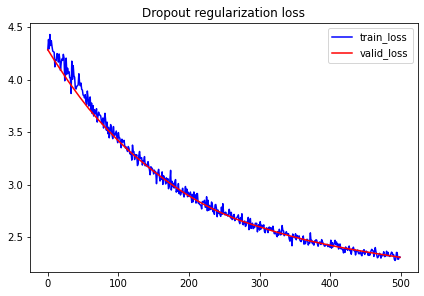

In [9]:
# baseline model with dropout regularization
from keras.regularizers import l2
from keras.layers import Dropout
input_size = 2880
batch_size = 500    
hidden_neurons = 400
epochs = 500

kernel_regularizer = l2(0.0001)

model = Sequential()     
model.add(Dense(hidden_neurons, activation = 'relu', input_dim=input_size))
model.add(Dropout(0.1))
model.add(Dense(classes, activation = 'relu', input_dim=hidden_neurons))
model.add(Dropout(0.1))
model.add(Dense(classes, activation = 'softmax', input_dim=hidden_neurons))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

hist_d = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

plt.plot(hist_d.history['loss'], 'b-', label='train_loss')
plt.plot(hist_d.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
plt.tight_layout()
plt.title('Dropout regularization loss')

Text(0.5, 1.0, 'Dropout regularization loss')

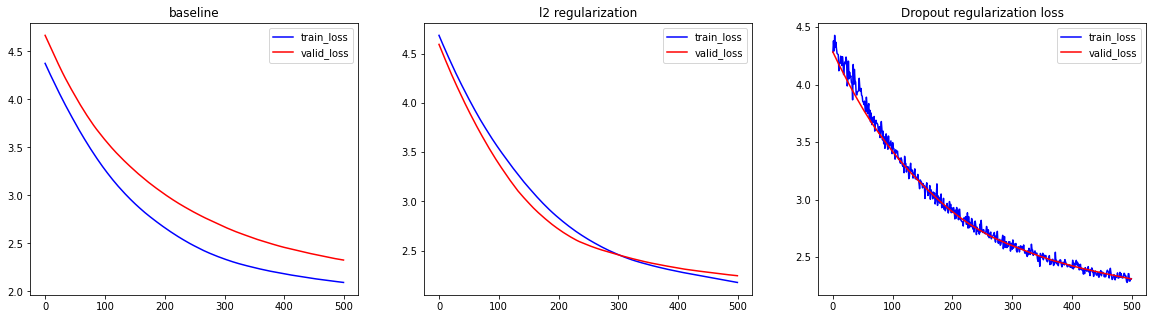

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(hist.history['loss'], 'b-', label='train_loss')
plt.plot(hist.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
# plt.ylim([0,3.5])
plt.title('baseline')

plt.subplot(1,3,2)
plt.plot(hist_l2.history['loss'], 'b-', label='train_loss')
plt.plot(hist_l2.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
# plt.ylim([0,3.5])
plt.title('l2 regularization')

plt.subplot(1,3,3)
plt.plot(hist_d.history['loss'], 'b-', label='train_loss')
plt.plot(hist_d.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
plt.title('Dropout regularization loss')
# plt.ylim([0,3.5])

In [26]:
import glob
import librosa
from sklearn.model_selection import train_test_split

speech_mnist_data = []
speech_mnist_target = []


# preprocessing for all audio (extract mel-spectrogram)
speech_mnist = glob.glob('./speech_mnist/*.npy')
for item in speech_mnist:
  target, speaker, index = item.split('/')[-1].split('.npy')[0].split('_')
  
  wavs = np.load(item)
  mel = librosa.feature.melspectrogram(wavs, sr=8000, n_mels=80)
  
  speech_mnist_data.append(mel)
  speech_mnist_target.append(np.eye(10)[(int)(target)])

# 모든 mel-spectrogram의 데이터 길이 (시간)을 확인합니다. 가장 긴 mel-spec에 맞춰 나머지 mel을 zero-padding 해주기 위함입니다.
data_length = []
for item in speech_mnist_data:
  data_length.append(np.shape(item)[1])


print('max length : ' + (str)(np.max(data_length)))


# zero-pad all mel to max length
def pad(mel, max_length):
  if np.shape(mel)[1] > max_length:
    return mel[:,:max_length]
  else:
    return np.concatenate((mel, np.zeros((80, max_length-np.shape(mel)[1]))), axis=1)

max_length = np.max(data_length)
speech_mnist_data_pad = []
for item in speech_mnist_data:
  speech_mnist_data_pad.append(pad(item, max_length))

speech_mnist_data_pad = np.asarray(speech_mnist_data_pad)
speech_mnist_data_pad = np.expand_dims(speech_mnist_data_pad, axis=3)

# speech_mnist_data_pad = np.reshape(speech_mnist_data_pad, (np.shape(speech_mnist_data_pad)[0],-1))
speech_mnist_target = np.asarray(speech_mnist_target)
print('shape of training data : ' + (str)(np.shape(speech_mnist_data_pad)))
# print('shape of training data (flatten) : ' + (str)(np.shape(speech_mnist_data_final)))
print('shape of target data : ' + (str)(np.shape(speech_mnist_target)))
print(X_test.shape)
X_train, X_test, Y_train, Y_test = train_test_split(speech_mnist_data_pad, speech_mnist_target, test_size=0.25, random_state=0)

/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1968
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1911
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1998
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1988
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2043
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1296
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1567
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1987
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1556
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1579
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1542
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1813
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2036
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1673
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1403
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal 

max length : 36
shape of training data : (2000, 80, 36, 1)
shape of target data : (2000, 10)
(500, 80, 36, 1)


/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1943
  warnings.warn(
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1772
  warnings.warn(


In [12]:
# CNN 모델을 설계해보자. 

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling
from keras.optimizers import Adam

# input_dims = np.shape(X_train[0])

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(80,36,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자. 
opt = Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [14]:
3 * 3 * 1 * 32 + 32

320

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 34, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 38, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 14, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 6, 32)        

In [15]:
# 모델과 loss, optimizer가 모두 정해졌으니, 이제 학습을 시켜보자.
hist = model.fit(X_train, Y_train, batch_size=64, epochs=20, validation_split = 0.1, verbose=1)

Epoch 1/20
22/22 [==============================] - 2s 98ms/step - loss: 2.3098 - accuracy: 0.1081 - val_loss: 2.2604 - val_accuracy: 0.1400
Epoch 2/20
22/22 [==============================] - 2s 92ms/step - loss: 2.2510 - accuracy: 0.1474 - val_loss: 2.1928 - val_accuracy: 0.1800
Epoch 3/20
22/22 [==============================] - 2s 94ms/step - loss: 2.1805 - accuracy: 0.1963 - val_loss: 2.0679 - val_accuracy: 0.2667
Epoch 4/20
22/22 [==============================] - 2s 95ms/step - loss: 2.1376 - accuracy: 0.2178 - val_loss: 2.0344 - val_accuracy: 0.2667
Epoch 5/20
22/22 [==============================] - 2s 94ms/step - loss: 2.0801 - accuracy: 0.2578 - val_loss: 1.9237 - val_accuracy: 0.3933
Epoch 6/20
22/22 [==============================] - 2s 94ms/step - loss: 1.9856 - accuracy: 0.2822 - val_loss: 1.8378 - val_accuracy: 0.3733
Epoch 7/20
22/22 [==============================] - 2s 92ms/step - loss: 1.9135 - accuracy: 0.3304 - val_loss: 1.7326 - val_accuracy: 0.3933
Epoch 8/20
22

In [25]:
# test set을 이용해 실제 성능을 확인
score = model.evaluate(X_test, Y_test, verbose=0)
print(X_test.shape)
print("Test Accuracy:", score[1])
# model.save('../mnist_trained')

(500, 80, 36, 1)
Test Accuracy: 0.7720000147819519


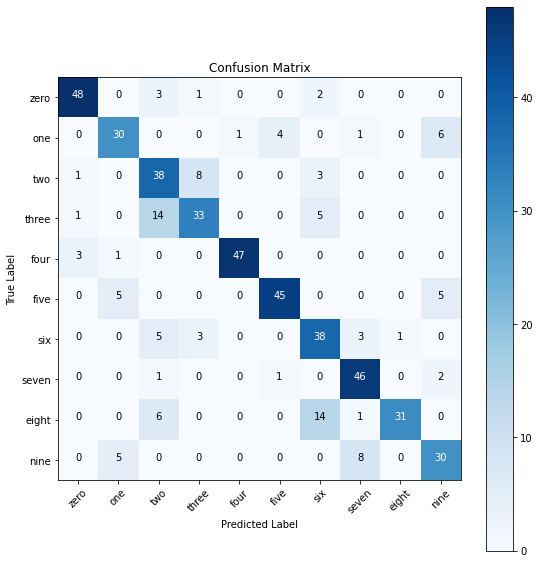

In [17]:
# confusion matrix 분석
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


In [18]:
# TSNE 분석
model_embedding = Model(inputs=[model.input], outputs=[model.layers[-3].output])
temp = model_embedding.predict(X_train)

from sklearn.manifold import TSNE
X = temp

X_embedded = TSNE(n_components=2,random_state=100).fit_transform(X)

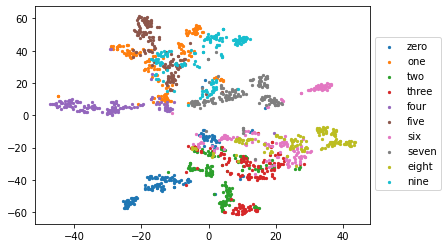

In [19]:
# 그리고 나서, 각 벡터들을 2차원 평면상에 클래스에 따라 그려보면 다음과 같다. 

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
numbers = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

plt.clf()
y_gt = np.argmax(Y_train,axis=1)
for i in range(10):
	index = np.where(y_gt==i)[0]
	plt.scatter(X_embedded[index][:,0], X_embedded[index][:,1], c = colors[i], label=numbers[i], s=5)


plt.legend(bbox_to_anchor=(1,0.88))
plt.show()

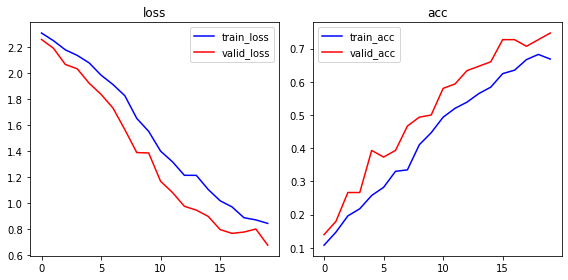

In [20]:
# loss 변화 확인
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label='train_loss')
plt.plot(hist.history['val_loss'], 'r-', label='valid_loss')
plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['accuracy'], 'b-', label='train_acc')
plt.plot(hist.history['val_accuracy'], 'r-', label='valid_acc')
plt.legend()

plt.tight_layout()
plt.show()

# Conv2D + RNN classifier

N H W C
N(batch) F(frequency) T(time) C(channel)

N Time C(F)

In [22]:
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization,pooling,Reshape, LSTM, Permute
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(BatchNormalization(input_shape=(80,36,1)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(2,2)))


print(model.output)

# Axis 주의
model.add(Reshape((20 * 32, 9)))
model.add(Permute((2, 1), input_shape=(20* 32, 9)))
model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(LSTM(100))
          

 
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

Tensor("max_pooling2d_4/MaxPool:0", shape=(None, 20, 9, 32), dtype=float32)


In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 80, 36, 1)         4         
_________________________________________________________________
activation (Activation)      (None, 80, 36, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 80, 36, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 36, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 80, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 80, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 40, 18, 32)       

In [24]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자. 
opt = Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [25]:
# 모델과 loss, optimizer가 모두 정해졌으니, 이제 학습을 시켜보자.
hist = model.fit(X_train, Y_train, batch_size=64, epochs=20, validation_split = 0.1, verbose=1)

Epoch 1/20
22/22 [==============================] - 1s 51ms/step - loss: 2.0527 - accuracy: 0.2593 - val_loss: 2.0661 - val_accuracy: 0.3067
Epoch 2/20
22/22 [==============================] - 0s 16ms/step - loss: 1.6756 - accuracy: 0.3778 - val_loss: 1.9529 - val_accuracy: 0.3267
Epoch 3/20
22/22 [==============================] - 0s 16ms/step - loss: 1.2598 - accuracy: 0.5541 - val_loss: 1.8751 - val_accuracy: 0.4000
Epoch 4/20
22/22 [==============================] - 0s 16ms/step - loss: 0.8730 - accuracy: 0.6852 - val_loss: 1.9965 - val_accuracy: 0.2533
Epoch 5/20
22/22 [==============================] - 0s 16ms/step - loss: 0.6041 - accuracy: 0.7800 - val_loss: 1.9504 - val_accuracy: 0.3000
Epoch 6/20
22/22 [==============================] - 0s 16ms/step - loss: 0.6258 - accuracy: 0.7763 - val_loss: 2.0321 - val_accuracy: 0.2800
Epoch 7/20
22/22 [==============================] - 0s 16ms/step - loss: 0.4590 - accuracy: 0.8400 - val_loss: 2.1142 - val_accuracy: 0.2467
Epoch 8/20
22

In [26]:
# test set을 이용해 실제 성능을 확인
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy:", score[1])

Test Accuracy: 0.7059999704360962


# Conv1D classifier

In [27]:
#Conv1D layer 에 입력으로 넣기 위해 마지막 channel 축 layer dimension 줄이기
X_train, X_test = np.squeeze(X_train), np.squeeze(X_test)

In [28]:
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Conv1D, BatchNormalization,pooling,Permute
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()
# input shape 주의
model.add(Permute((2, 1), input_shape=(80, 36)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(Flatten())
 
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_1 (Permute)          (None, 36, 80)            0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 36, 80)            320       
_________________________________________________________________
activation_5 (Activation)    (None, 36, 80)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 36, 64)            15424     
_________________________________________________________________
batch_normalization_6 (Batch (None, 36, 64)            256       
_________________________________________________________________
activation_6 (Activation)    (None, 36, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 36, 64)           

In [30]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자. 
opt = Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# 모델과 loss, optimizer가 모두 정해졌으니, 이제 학습을 시켜보자.
hist = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split = 0.1, verbose=1)

# test set을 이용해 실제 성능을 확인
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy:", score[1])

Epoch 1/100
22/22 [==============================] - 1s 32ms/step - loss: 2.3321 - accuracy: 0.1170 - val_loss: 2.5166 - val_accuracy: 0.1333
Epoch 2/100
22/22 [==============================] - 0s 11ms/step - loss: 2.1452 - accuracy: 0.2015 - val_loss: 2.3859 - val_accuracy: 0.1667
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 2.0325 - accuracy: 0.2644 - val_loss: 2.2028 - val_accuracy: 0.2067
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 1.9755 - accuracy: 0.2889 - val_loss: 2.2668 - val_accuracy: 0.1667
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 1.8872 - accuracy: 0.3104 - val_loss: 2.1128 - val_accuracy: 0.2267
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 1.8072 - accuracy: 0.3526 - val_loss: 1.9225 - val_accuracy: 0.3200
Epoch 7/100
22/22 [==============================] - 0s 13ms/step - loss: 1.7247 - accuracy: 0.3719 - val_loss: 1.8770 - val_accuracy: 0.3000
Epoch 

# Conv1D + RNN classifier

In [31]:
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Conv1D, BatchNormalization,pooling, LSTM, Permute
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(BatchNormalization(input_shape=(80,36)))
model.add(Activation('relu'))
model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(32,3,padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling1D(pool_size=2))
print(model.output)

# model.add(BatchNormalization())
# model.add(Activation('relu'))
# Axis 주의
# model.add(Reshape((10 * 32, 9)))
model.add(Permute((2, 1), input_shape=(10, 32)))
model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(LSTM(100))
          

 
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))


Tensor("max_pooling1d_7/Squeeze:0", shape=(None, 10, 32), dtype=float32)


In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 80, 36)            144       
_________________________________________________________________
activation_15 (Activation)   (None, 80, 36)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 80, 64)            6976      
_________________________________________________________________
batch_normalization_16 (Batc (None, 80, 64)            256       
_________________________________________________________________
activation_16 (Activation)   (None, 80, 64)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 80, 64)            12352     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 40, 64)           

In [33]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자. 
opt = Adam(lr=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# 모델과 loss, optimizer가 모두 정해졌으니, 이제 학습을 시켜보자.
hist = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split = 0.1, verbose=1)

# test set을 이용해 실제 성능을 확인
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy:", score[1])

Epoch 1/100
22/22 [==============================] - 1s 56ms/step - loss: 2.1648 - accuracy: 0.2104 - val_loss: 2.2322 - val_accuracy: 0.2133
Epoch 2/100
22/22 [==============================] - 0s 14ms/step - loss: 1.9200 - accuracy: 0.2822 - val_loss: 2.1916 - val_accuracy: 0.2200
Epoch 3/100
22/22 [==============================] - 0s 14ms/step - loss: 1.7489 - accuracy: 0.3489 - val_loss: 2.1249 - val_accuracy: 0.1733
Epoch 4/100
22/22 [==============================] - 0s 14ms/step - loss: 1.5748 - accuracy: 0.4289 - val_loss: 2.0609 - val_accuracy: 0.2800
Epoch 5/100
22/22 [==============================] - 0s 14ms/step - loss: 1.3527 - accuracy: 0.5281 - val_loss: 2.0145 - val_accuracy: 0.2933
Epoch 6/100
22/22 [==============================] - 0s 14ms/step - loss: 1.1690 - accuracy: 0.5889 - val_loss: 1.7969 - val_accuracy: 0.4133
Epoch 7/100
22/22 [==============================] - 0s 17ms/step - loss: 1.0096 - accuracy: 0.6244 - val_loss: 1.7387 - val_accuracy: 0.3933
Epoch 

# Data augmentation with speech mnist

# aug1. sampling rate 변환 

In [34]:
audio_path = './speech_mnist/0_jackson_0.wav'
audio_1, sr_1 = librosa.load(audio_path, sr=None)
print('이 오디오의 샘플 레이트는 :', sr_1, 'Hz')
ipd.Audio(audio_1, rate=sr_1, autoplay=False)

이 오디오의 샘플 레이트는 : 8000 Hz


In [35]:
audio_path = './speech_mnist/0_jackson_0.wav'
random_sample = np.random.randint(5000, 10000)
print(random_sample)

audio_2, sr_2 = librosa.load(audio_path, sr=random_sample)
print('이 오디오의 샘플 레이트는 :', sr_2, 'Hz')
ipd.Audio(audio_2, rate=sr_2, autoplay=False)

9113
이 오디오의 샘플 레이트는 : 9113 Hz


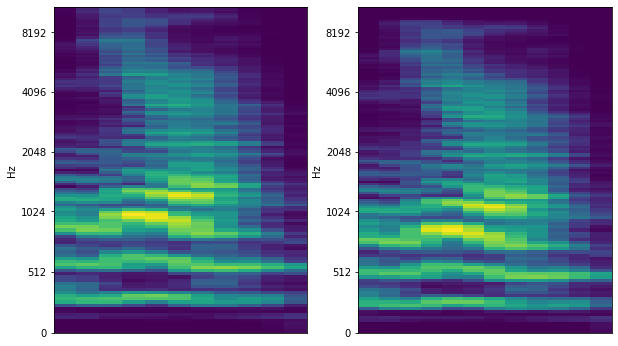

In [36]:
mel_1 = librosa.feature.melspectrogram(audio_1)
mel_2 = librosa.feature.melspectrogram(audio_2)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
librosa.display.specshow(np.log(mel_1 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,2,2)
librosa.display.specshow(np.log(mel_2 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')

plt.show()

# aug2. pitch 변환

In [37]:
audio_path = './speech_mnist/0_jackson_0.wav'
audio, sr = librosa.load(audio_path, sr=None)
print('이 오디오의 샘플 레이트는 :', sr, 'Hz')
ipd.Audio(audio, rate=sr, autoplay=False)

이 오디오의 샘플 레이트는 : 8000 Hz


In [38]:
pitch_factor = 0.75 + (np.random.rand(1)*0.5)[0]
print(pitch_factor)
pitch_factor = 1
audio_shift = librosa.effects.pitch_shift(audio, sr, pitch_factor)
ipd.Audio(audio_shift, rate=sr, autoplay=False)

0.9152752318691916


/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


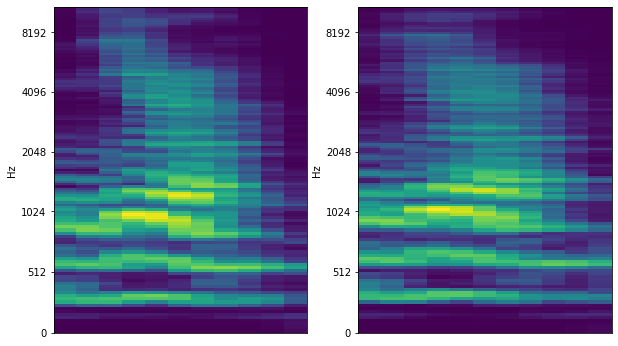

In [39]:
mel_1 = librosa.feature.melspectrogram(audio)
mel_2 = librosa.feature.melspectrogram(audio_shift)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
librosa.display.specshow(np.log(mel_1 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,2,2)
librosa.display.specshow(np.log(mel_2 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')

plt.show()

# aug3. 배경소음 합성 + 시간 축 변환

**TAU Urban Acoustic Scenes 2019 dataset의 배경 소음 데이터셋 사용**


Airport

Indoor shopping mall

Metro station

Pedestrian street

Public square

Street with medium level of traffic

Travelling by a tram

Travelling by a bus

Travelling by an underground metro

Urban park



**시간 축 변환**

전체 오디오에서 실제 speech 가 있는 구간을 시간상에서 무작위로 배치

(speech가 전체 오디오의 정 가운데에 위치하지 않아도 감지하도록...)

In [40]:
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1vD81Qm6mCfekYr4YUk2YblzAMYpwJ8Ec' -O noise.wav
bg_path = './noise.wav'
bg, sr = librosa.load(bg_path, sr=8000)
ipd.Audio(bg, rate=sr, autoplay=False)

In [41]:
audio_path = './speech_mnist/0_jackson_0.wav'
audio, sr = librosa.load(audio_path, sr=None)
ipd.Audio(audio, rate=sr, autoplay=False)


0.7024322869311164


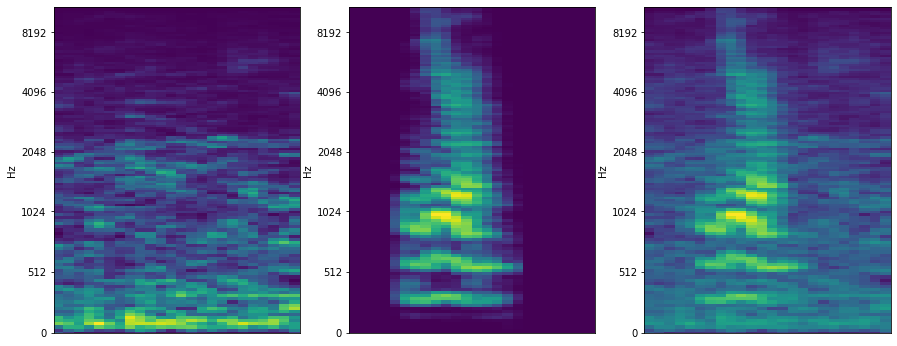

In [42]:
random_bg_location = np.random.randint(0, len(bg)-sr*2)
random_audio_location = np.random.randint(0, sr*1.5 - len(audio))

random_bg = bg[random_bg_location:int(random_bg_location+sr*1.5)]
random_audio = np.concatenate((np.concatenate((np.zeros(random_audio_location),audio)),np.zeros(int(sr*1.5 - random_audio_location - len(audio)))))


sum_factor = 0.3 + (np.random.rand(1)*0.5)[0]
print(sum_factor)
sum_factor = 4
audio_sum = random_bg*sum_factor + random_audio


mel_1 = librosa.feature.melspectrogram(random_bg)
mel_2 = librosa.feature.melspectrogram(random_audio)
mel_3 = librosa.feature.melspectrogram(audio_sum)

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
librosa.display.specshow(np.log(mel_1 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,3,2)
librosa.display.specshow(np.log(mel_2 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,3,3)
librosa.display.specshow(np.log(mel_3 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')

plt.show()


ipd.Audio(audio_sum, rate=sr, autoplay=False)

In [43]:
# How about another noise dataset?

!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1IrdO3weEzG2qvOtPx9Q-rXLYqPivaFyE' -O data.zip

!unzip -qq -o /content/data.zip -d ./



unzip:  cannot find or open /content/data.zip, /content/data.zip.zip or /content/data.zip.ZIP.


# aug4. 공간 잔향 합성




Diaz-Guerra, David, Antonio Miguel, and Jose R. Beltran. "gpuRIR: A python library for Room Impulse Response simulation with GPU acceleration." arXiv preprint arXiv:1810.11359 (2018).

In [29]:
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=12qCUW_Fagd-soNDk_ZbNFnQCESSm-wt5' -O reverb.wav

In [30]:
ir_path = './reverb.wav'
ir, sr = librosa.load(ir_path, sr=8000)
ipd.Audio(ir, rate=sr, autoplay=False)

/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/ccw/anaconda3/envs/CL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


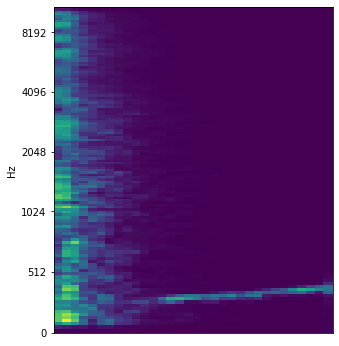

In [32]:
# 잔향 impulse response의 spectrogram 확인
mel_ir = librosa.feature.melspectrogram(ir)

plt.figure(figsize=(5,6))
librosa.display.specshow(np.log(mel_ir + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.show()

In [31]:
# tager audio에 잔향 convolution
audio_sum_conv = np.convolve(audio_sum,ir)
audio_sum_conv = audio_sum_conv[0:int(sr*1.5)]


ipd.Audio(audio_sum_conv, rate=sr, autoplay=False)

NameError: name 'audio_sum' is not defined

In [33]:
# reverb convolution 전 후 spectrogram 비교
mel_1 = librosa.feature.melspectrogram(audio_sum)
mel_2 = librosa.feature.melspectrogram(audio_sum_conv)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
librosa.display.specshow(np.log(mel_1 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,2,2)
librosa.display.specshow(np.log(mel_2 + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.show()

print(np.shape(mel_2))

NameError: name 'audio_sum' is not defined

# aug5. spec augmentation


Park, Daniel S., et al. "Specaugment: A simple data augmentation method for automatic speech recognition." arXiv preprint arXiv:1904.08779 (2019)

In [27]:
mel_spec = librosa.feature.melspectrogram(audio_sum_conv)

f_frame = np.random.randint(0, 32)
t_frame = np.random.randint(0,6)

f_location = np.random.randint(0,128-f_frame)
t_location = np.random.randint(0,24-t_frame)

for i in range(0,f_frame):
  mel_spec[f_location+i,:] = 0

for i in range(0,t_frame):
  mel_spec[:,t_location+t_frame] = 0

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
librosa.display.specshow(np.log(librosa.feature.melspectrogram(audio_sum_conv) + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.subplot(1,2,2)
librosa.display.specshow(np.log(mel_spec + 1e-3), cmap='viridis', x_axis=None, y_axis='mel')
plt.show()


NameError: name 'audio_sum_conv' is not defined